# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## K-Means Clustering

In [151]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [152]:
# Import neighborhood data
neighborhoods= pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/neighborhood_geo.csv')
neighborhoods.head()

,id,borough,neighborhood,longitude,latitude
0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705
1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294
2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556
3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437
4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834


In [153]:
# Import scaled feature data
features_scaled = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/features_scaled_modeling.csv')
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,0.209833,0.497484,-0.281050,0.168836,-0.397033,1.401403,-0.520885,-0.346817,-0.259182,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
1,-0.178723,-0.367460,-0.281050,-0.403089,-0.710156,-0.236601,-0.347004,-0.293218,0.477897,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
2,-0.373000,-0.691814,-0.766385,-0.784372,-0.344845,-0.330201,-0.984567,-0.346817,-0.554014,-0.394861,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
3,-0.470139,0.443425,-0.232517,-0.403089,-0.188284,-1.172603,0.174638,-1.258001,-0.996261,0.244438,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
4,-0.373000,-1.394580,-0.329584,-0.212447,-0.083909,-0.845002,0.116678,-1.258001,-0.947122,-0.181762,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726


In [154]:
# Import venues sorted
most_common_venues = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/most_common_venues.csv')
most_common_venues.head()

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.1,church,restaurant,store,school,clothing
1,nyu_2451_34572.2,restaurant,store,clothing,school,church
2,nyu_2451_34572.3,store,restaurant,church,school,clothing
3,nyu_2451_34572.4,restaurant,school,bank,park,store
4,nyu_2451_34572.5,school,bank,restaurant,store,park


### K-Means

In [155]:
# Create elbow graph function
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

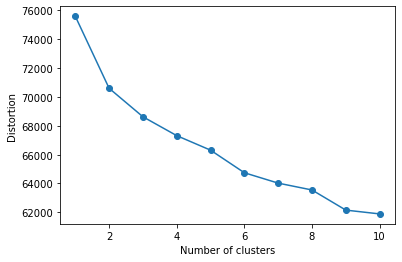

In [156]:
# Plot elbow graph
plot_distortion(features_scaled)

In [157]:
# Cluster data points using kmeans and get labels
kclusters_features = 8

kmeans_features = KMeans(n_clusters=kclusters_features, random_state=0).fit(features_scaled)

kmeans_features.labels_[0:10] 

array([3, 3, 1, 5, 5, 5, 5, 5, 5, 3], dtype=int32)

In [158]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

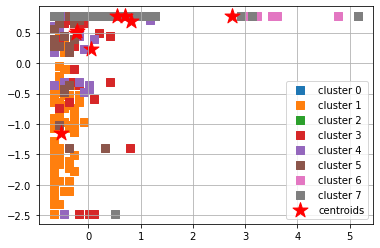

In [159]:
y_km_features = kmeans_features.fit_predict(features_scaled)
plot_clusters(np.array(features_scaled), y_km_features, plt_cluster_centers= True)

In [160]:
# Create list of clusters
clusters = kmeans_features.labels_.tolist()

In [161]:
# Merge venue data with neighborhood data
features_data = neighborhoods.copy()
features_data = pd.merge(features_data, most_common_venues, on='id')
features_data = features_data.drop('id', axis=1)
features_data['clusters'] = clusters
features_data.head()

,borough,neighborhood,longitude,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,Bronx,Wakefield,-73.847201,40.894705,church,restaurant,store,school,clothing,3
1,Bronx,Co-op City,-73.829939,40.874294,restaurant,store,clothing,school,church,3
2,Bronx,Eastchester,-73.827806,40.887556,store,restaurant,church,school,clothing,1
3,Bronx,Fieldston,-73.905643,40.895437,restaurant,school,bank,park,store,5
4,Bronx,Riverdale,-73.912585,40.890834,school,bank,restaurant,store,park,5


### Mapping

In [162]:
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

In [163]:
# Create a map of new york

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Plot clusters on map of New York
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_features)
ys = [i + x + (i*x)**2 for i in range(kclusters_features)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(features_data['latitude'], features_data['longitude'], features_data['neighborhood'],features_data['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyzing Clusters

In [164]:
cluster0 = features_data.loc[features_data['clusters'] == 0, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster1 = features_data.loc[features_data['clusters'] == 1, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster2 = features_data.loc[features_data['clusters'] == 2, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster3 = features_data.loc[features_data['clusters'] == 3, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster4 = features_data.loc[features_data['clusters'] == 4, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster5 = features_data.loc[features_data['clusters'] == 5, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster6 = features_data.loc[features_data['clusters'] == 6, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]
cluster7 = features_data.loc[features_data['clusters'] == 7, features_data.columns[[0] + [1] + list(range(4, features_data.shape[1]))]]

In [165]:
print('--cluster0--')
print()
print('Top 5 most common venue type')
print(cluster0['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster0['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster0['borough'].value_counts()[:3])

--cluster0--

Top 5 most common venue type
restaurant    3
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
school    2
store     1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    3
Name: borough, dtype: int64


In [166]:
print('--cluster1--')
print()
print('Top 5 most common venue type')
print(cluster1['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster1['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster1['borough'].value_counts()[:3])

--cluster1--

Top 5 most common venue type
restaurant    59
store         26
school         3
church         3
clothing       1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         49
restaurant    21
church         7
school         7
clothing       5
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Staten Island    50
Queens           26
Bronx            10
Name: borough, dtype: int64


In [167]:
print('--cluster2--')
print()
print('Top 5 most common venue type')
print(cluster2['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster2['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster2['borough'].value_counts()[:3])

--cluster2--

Top 5 most common venue type
school    1
store     1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
church        1
restaurant    1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn    2
Name: borough, dtype: int64


In [168]:
print('--cluster3--')
print()
print('Top 5 most common venue type')
print(cluster3['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster3['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster3['borough'].value_counts()[:3])

--cluster3--

Top 5 most common venue type
restaurant    16
church        13
school        10
store          7
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         17
church        13
restaurant    11
school         4
clothing       1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn    17
Bronx       13
Queens      13
Name: borough, dtype: int64


In [169]:
print('--cluster4--')
print()
print('Top 5 most common venue type')
print(cluster4['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster4['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster4['borough'].value_counts()[:3])

--cluster4--

Top 5 most common venue type
restaurant    32
store          9
church         4
school         3
park           1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         27
school         8
restaurant     6
church         5
clothing       2
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Queens           22
Brooklyn         17
Staten Island     6
Name: borough, dtype: int64


In [170]:
print('--cluster5--')
print()
print('Top 5 most common venue type')
print(cluster5['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster5['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster5['borough'].value_counts()[:3])

--cluster5--

Top 5 most common venue type
restaurant    39
store         10
school         7
church         3
bar            1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         36
restaurant     9
church         8
school         4
bank           1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Bronx       29
Queens      15
Brooklyn     8
Name: borough, dtype: int64


In [171]:
print('--cluster6--')
print()
print('Top 5 most common venue type')
print(cluster6['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster6['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster6['borough'].value_counts()[:3])

--cluster6--

Top 5 most common venue type
restaurant    4
lodging       3
school        3
clothing      1
bar           1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
school    5
store     3
bar       3
bank      2
health    1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    11
Queens        2
Brooklyn      1
Name: borough, dtype: int64


In [172]:
print('--cluster7--')
print()
print('Top 5 most common venue type')
print(cluster7['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster7['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster7['borough'].value_counts()[:3])

--cluster7--

Top 5 most common venue type
restaurant    18
school        12
bar            2
lodging        2
office         2
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
school        12
bar           10
store          7
restaurant     3
clothing       2
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn     17
Manhattan    17
Queens        3
Name: borough, dtype: int64


# Hierarchical Clustering

In [173]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [174]:
# Import scaled feature data
features_scaled = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/features_scaled_modeling.csv')
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,0.209833,0.497484,-0.281050,0.168836,-0.397033,1.401403,-0.520885,-0.346817,-0.259182,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
1,-0.178723,-0.367460,-0.281050,-0.403089,-0.710156,-0.236601,-0.347004,-0.293218,0.477897,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
2,-0.373000,-0.691814,-0.766385,-0.784372,-0.344845,-0.330201,-0.984567,-0.346817,-0.554014,-0.394861,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
3,-0.470139,0.443425,-0.232517,-0.403089,-0.188284,-1.172603,0.174638,-1.258001,-0.996261,0.244438,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
4,-0.373000,-1.394580,-0.329584,-0.212447,-0.083909,-0.845002,0.116678,-1.258001,-0.947122,-0.181762,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726


In [175]:
X = np.array(features_scaled)

### Denodrogram

In [176]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

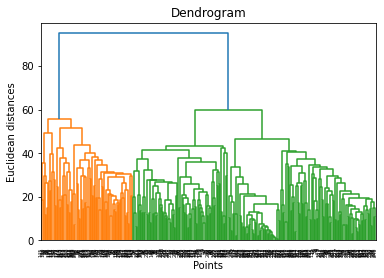

In [177]:
# Plot dendrogram
plot_dendrogram(X)

### Agglomerative Clustering

In [178]:
# Create clustering object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [179]:
# fit and predict
y_hc = ac.fit_predict(features_scaled)

In [180]:
# Create plot
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

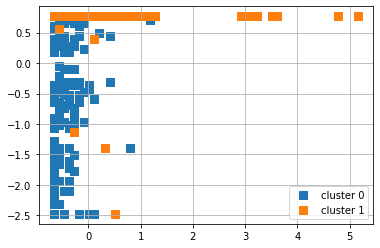

In [181]:
# Plot clustering result
plot_clusters(X,y_hc)

### Analysing Clusters

In [182]:
clusters_heirarchical = y_hc.tolist()

In [183]:
heirarchical_data = neighborhoods.copy()
heirarchical_data = pd.merge(heirarchical_data, most_common_venues, on='id' )
heirarchical_data = heirarchical_data.drop('id', axis=1)
heirarchical_data['clusters'] = clusters_heirarchical
heirarchical_data.head()

,borough,neighborhood,longitude,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,Bronx,Wakefield,-73.847201,40.894705,church,restaurant,store,school,clothing,0
1,Bronx,Co-op City,-73.829939,40.874294,restaurant,store,clothing,school,church,0
2,Bronx,Eastchester,-73.827806,40.887556,store,restaurant,church,school,clothing,0
3,Bronx,Fieldston,-73.905643,40.895437,restaurant,school,bank,park,store,0
4,Bronx,Riverdale,-73.912585,40.890834,school,bank,restaurant,store,park,0


In [184]:
cluster0_heirarchical = heirarchical_data.loc[heirarchical_data['clusters'] == 0]
cluster1_heirarchical = heirarchical_data.loc[heirarchical_data['clusters'] == 1]

In [185]:
print('--cluster0--')
print()
print('Top 5 most common venue type')
print(cluster0_heirarchical['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster0_heirarchical['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster0_heirarchical['borough'].value_counts()[:3])

--cluster0--

Top 5 most common venue type
restaurant    132
store          48
church         20
school         18
park            2
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         114
restaurant     43
church         30
school         21
clothing        8
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Queens           64
Staten Island    61
Bronx            51
Name: borough, dtype: int64


In [186]:
print('--cluster1--')
print()
print('Top 5 most common venue type')
print(cluster1_heirarchical['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster1_heirarchical['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster1_heirarchical['borough'].value_counts()[:3])

--cluster1--

Top 5 most common venue type
restaurant    39
school        21
store          5
lodging        5
church         5
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         26
school        21
bar           15
restaurant     8
church         5
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    36
Brooklyn     28
Queens       17
Name: borough, dtype: int64


# Segmentation of NYC neighborhoods

The goal of this project is to segment the neighborhoods of New York City into separate clusters and examine the information about them. For clustering, We can use any available information **except** demographic and economic indicators. We don't want to segment them based on those and we want to keep them for the **profiling of clusters** to see if there are any important economic differences between the created clusters.

### Feature Engineering

Feature engineering plays a crucial role in this problem. We have limited amount of attributes so we need to create some features that will be important for segmentation.

- Google Places, Yelp and Foursquare APIs: number of venues, density of venues per square mile, number of restaurants, top restarurant category...
- Uber: number of rides per day in the neighborhood
- Meetups: number of events
- etc...

### Feature Selection / Dimensionality Reduction¶
We need to apply different selection techniques to find out which one will be the best for our problems.

Original Features vs. PCA conponents?

Don't forget to scale the features for KMeans.

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on restaurant features
- clustering only on Uber features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

### Evaluation

1. Check the segmentation evaluation metrics:
    - inertia
    - silhoutte score
2. How did you come up with the correct number of clusters?
3. Is there any relationship between the clusters and economic indicators? If yes, what does it mean?

You are required to share the file containing all NYC neighborhoods together with cluster_id with LighthouseLabs.